<a href="https://colab.research.google.com/github/chiyar/chiyar.github.io/blob/master/seminar_tf2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow

![img](https://lh3.googleusercontent.com/I1Dpp7I9RZIGl0rVMlPfnhfl-bkl_2uDHZwVC87BWmqtPaAs1irMWOdJxTmTEQJB-VGfLryCyHxqvyNchVIVLL-vqGrF3Q=s688)

В этом семинаре мы познакомимся с [Tensorflow](https://www.tensorflow.org/) и напишем на нём что-нибудь машинно-обучаемое.

__[Если вы работаете локально]__ Устанавливаем tensorflow:
* `pip install tensorflow==2.0.0rc0` хватит на первое время
* Если вы хотите поддержку GPU или  TF специально собранный под ваш процессор, вам [сюда](https://www.tensorflow.org/install/)

In [0]:
!pip install tensorflow==2.0.0rc0 &> log

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### __TensorFlow__ vs __numpy__

Давайте посмотрим на то из чего состоят типичные программы на tensorflow и numpy.

In [0]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x, x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x, axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



Теперь напишем то же самое на TensorFlow.

In [0]:
# tensorflow world

x = tf.reshape(tf.range(16), [4, 4])

print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n%s" % tf.matmul(x, tf.transpose(x)))
print("mean over cols :\n%s" % tf.reduce_mean(x, axis=-1))
print("cumsum of cols :\n%s" % tf.cumsum(x, axis=0))
print("x + numpy array: \n%s" % (x + np.arange(4)))

X :
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int32)
X.shape : (4, 4)

add 5 :
tf.Tensor(
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]], shape=(4, 4), dtype=int32)
X*X^T  :
tf.Tensor(
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]], shape=(4, 4), dtype=int32)
mean over cols :
tf.Tensor([ 1  5  9 13], shape=(4,), dtype=int32)
cumsum of cols :
tf.Tensor(
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]], shape=(4, 4), dtype=int32)
x + numpy array: 
tf.Tensor(
[[ 0  2  4  6]
 [ 4  6  8 10]
 [ 8 10 12 14]
 [12 14 16 18]], shape=(4, 4), dtype=int32)


## А теперь подробнее

Как вы, наверное, заметили, на tensorflow писать примерно так же как на numpy. Есть тензоры - они выглядят, звучат и пахнут как numpy.array. Даже операции в tensorflow очень похожи на numpy:

  * Поэлементные операции: __`a + b, a / b, a ** b, ...`__
  * np.sin -> __tf.sin__
  * np.mean -> __tf.reduce_mean__
  * np.arange -> __tf.range__
  * np.zeros -> __tf.zeros__
  * np.random.randn -> __tf.random_normal__


Вот только у каждой второй функции отличается название или интерфейс. И да, вам предстоит заново к ним привыкать. Развлекайтесь!

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)


Несколько общих соображений: 
* np.array([...]) -> tf.convert_to_tensor([...]). Обратно: x.numpy()
* у tf тензоров нет .методов(). x.transpose() -> tf.transpose(x)
* np.mean, np.all, np.sum, ... -> tf.reduce_mean, tf.reduce_all, ...

Если вы не можете найти какую-нибудь функцию, добро пожаловать в [документацию](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf). Или ещё лучше - используйте ctrl+пробел в colab-е (shift+tab в jupyter) чтобы узнать API интересующей вас функции. Слишком много и страшно? Страшно было бы учить нейронки без GPU и автоматических градиентов. А с TF чем дальше, тем проще. Начнём с малого

### Задание 1: polar pretzels
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

Есть в тригонометрии класс функций с забавными графиками. Вот пример:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$

__задание:__ реализуйте вычисление этой функции на tensorflow (см. ниже)


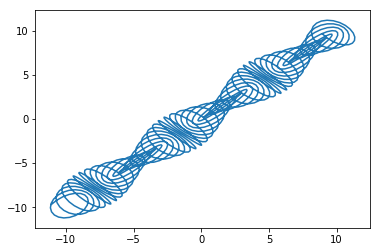

In [0]:
t = tf.linspace(-10.0, 10.0, num=1000)

x = ###YOUR CODE
y = ###YOUR CODE

plt.plot(x.numpy(), y.numpy());

Если вы уже выполнили задание, предлагаем
* поиграться с параметрами кренделя
* работа с размерностями в TF - [тут](https://gist.github.com/justheuristic/138fde49b32ec59f2d80298f6959d5ab#file-md)
* визуализация TF-ных вычислений в виде графа  - [тут](https://gist.github.com/justheuristic/138fde49b32ec59f2d80298f6959d5ab#file-tensorboard-md)


А ещё есть длинный, но клёвый обзор всех фичей [tensorflow 2.0](https://www.tensorflow.org/beta/guide/effective_tf2) - но лучше читать его уже после семинара.

### Задание 2: mean squared error

__задание__ посчитайте MSE по 2 векторам - предсказаниям и правильным ответам. На TF, естественно

In [0]:
def compute_my_mse(y_target, y_predicted):
    return <вычислите mse между y_target и y_predicted>

In [0]:
# Тесты
from sklearn.metrics import mean_squared_error

for n in [1, 5, 10, 10 ** 3]:
    
    elems = [np.arange(n), np.arange(n, 0, -1), np.zeros(n),
             np.ones(n), np.random.random(n), np.random.randint(100,size=n)]
    
    for el in elems:
        for el_2 in elems:
            el, el2 = el.astype('float32'), el_2.astype('float32')
            true_mse = np.array(mean_squared_error(el, el_2))
            my_mse = compute_my_mse(el, el_2)
            if not np.allclose(true_mse, my_mse):
                print('Ошибка:')
                print('mse(%s,%s)' % (el,el_2))
                print("должно быть: %f, получилось: %f" % (true_mse, my_mse))
                raise ValueError("Что-то не так")

print("Все тесты пройдены!")    

Все тесты пройдены!


Bonus round: вы можете ускорять TF-ные вычисления при помощи [`tf.function`](https://www.tensorflow.org/beta/tutorials/eager/tf_function). В большинстве случаев достаточно написать @tf.function перед объявлением функции и TF оптимизирует граф вычислений.

# Автоматические градиенты

В Tensorflow вы можете автоматически вычислить производные функции используя [GradientTape](https://www.tensorflow.org/beta/tutorials/eager/automatic_differentiation). Интуитивно это такая штука, которая записыват всю историю операций чтобы потом посчитать производные.

Чтобы вычислить производные, tf он проходит по операциям, участвовавшим в вычислении и применяет chain rule, например
$$ {\partial \text{tf.exp}(\text{tf.cos}(x)) \over \partial x} = {\partial \text{tf.exp}(\text{tf.cos}(x)) \over \partial \text{tf.cos}(x)}\cdot {\partial \text{tf.cos}(x) \over \partial x} $$

* Производные всех элементарных функций (tf.exp, tf.cos, tf.reduce_sum) уже реализованы в TF

Таким образом вы можете посчитать производную любого скалярного значения по любому тензору, участвующему в его вычислении. 

_Давайте поиграемся :)_

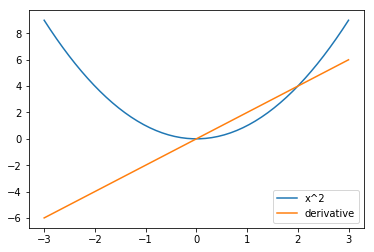

In [0]:
x = tf.linspace(-3.0, 3.0, num=50)

with tf.GradientTape() as tape:
    tape.watch(x)
    x_squared = x ** 2
    y = tf.reduce_sum(x_squared)

grads = tape.gradient(y, x)

plt.plot(x, x_squared, label="x^2")
plt.plot(x, grads, label="derivative")
plt.legend();

### Почему это круто

Ниже определена функция __`weird_psychotic_function`__ от __`my_scalar`__ и __`my_vector`__. Что она делает... ой, вам лучше не знать.

__ваша задача:__ вычислить производную этой функции по __my_scalar__.

In [0]:
@tf.function
def weird_psychotic_function(my_scalar, my_vector):
    return tf.reduce_mean((my_vector+my_scalar)**(1+tf.nn.moments(my_vector,[0])[1]) + 1./ tf.atan(my_scalar))/(my_scalar**2 + 1) + 0.01*tf.sin(2*my_scalar**1.5)*(tf.reduce_sum(my_vector)* my_scalar**2)*tf.exp((my_scalar-4)**2)/(1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2))/(1+tf.exp(-(my_scalar-4)**2)))**2

def weird_psychotic_gradient(my_scalar, my_vector):
    """ Compute derivatives of weird_psychotic_function w.r.t. my_scalar, use tf.GraidentTape """    
    ### Your code goes here ###
    derivative_wrt_scalar = <...>
    return derivative_wrt_scalar

W0903 02:43:32.733084 140422218831744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/math_grad.py:1375: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


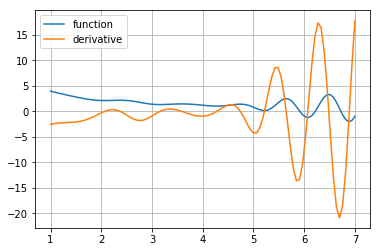

In [0]:
scalar_space = tf.linspace(1.0, 7.0, 100)
vector = tf.range(1, 4, dtype=tf.float32)

y = [weird_psychotic_function(x, vector) for x in scalar_space]
y_der_by_scalar = [weird_psychotic_gradient(x, vector) for x in scalar_space]
plt.plot(scalar_space, y, label='function')


plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid()
plt.legend();

# Переменные (Variables) и обучение

У практически любой машиннообучаемой модели есть параметры (например, веса нейронной сети), которые изменяются в процессе обучения [`(tf.Variable)`](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Значение переменной можно изменить через `var.assign(new_value)`
* Переменные автоматически "подписываются" в tf.GradientTape, вам не нужно писать tape.watch(variable)
* Больше про то, как работают переменные - [тык](https://www.tensorflow.org/guide/variables).

А пока давайте что-нибудь обучим! Например, линейную регрессию. Одномерную.

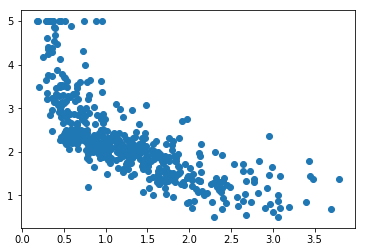

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
x, y = boston.data[:, -1] / 10, boston.target / 10
plt.scatter(x, y)

In [0]:
from IPython.display import clear_output

# Create variables
w = tf.Variable(0.0)
b = tf.Variable(0.0)
# note: variables can be scalars, vectors or tensors, e.g. tf.Variable([1, 2, 3])

for i in range(100):

    # Compute loss
    with tf.GradientTape() as tape:
        y_pred = w * x + b

        # Вычислите среднеквадратичную ошибку (скаляр) между y_pred и y - вручную или с помощью compute_my_mse
        loss = <ваш код>
    
    # gradient descent
    dw, db = tape.gradient(loss, [w, b])
    w.assign(w - 0.05 * dw)
    b.assign(b - 0.05 * db)

    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x, y)
        plt.scatter(x, y_pred, color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.numpy())
        if loss < 0.5:
            print("Done!")
            break

### Давайте поиграем

__Первый квест:__ модифицируйте код выше так, чтобы он обучал квадратичную функцию
__Hint 1:__ возможно модель будет учиться лучше если ей поменять learning rate или увеличить число итераций

```

```



__Второй квест:__ всё то же самое, но теперь нужно научить двуслойную нейросеть с ReLU. 

__Hint 2:__ не забывайте правильно инициализировать веса! Для двухслойной нейронки хватит нормальной инициализации "на глаз", а про более серьёзные инициализаторы можно узнать [тут](https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528).


### Hight-level API: модели и оптимизаторы

Чтобы вам не приходилось вручную описывать каждый нейрон и шаг градиентного спуска, в TensorFlow есть библиотека [Keras]((https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras), в которой реализовано множество [стандартных слоёв](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers) и [алгоритмов оптимизации](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers) . Кроме обычного SGD там есть rmsprop, adam и все-все-все - ctrl+пробел / shift+tab вам в помощь.

In [0]:
L = tf.keras.layers
model = tf.keras.models.Sequential()
model.add(L.Dense(units=100))
model.add(L.Activation('elu'))
model.add(L.Dense(units=1))

optimizer = tf.keras.optimizers.Adam()

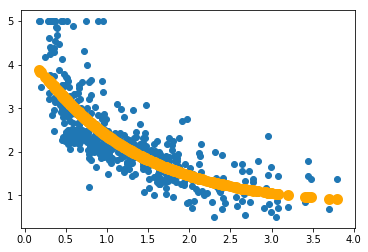

loss =  0.29723722
Done!


In [0]:
# convert x and y vectors to matrices for compatibility with tf.keras
x = tf.cast(tf.reshape(x, [len(x), 1]), tf.float32)
y = tf.cast(tf.reshape(y, [len(y), 1]), tf.float32)

for i in range(1000):

    # Compute loss
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = tf.reduce_mean((y_pred - y) ** 2)
    
    # gradient descent
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # the rest of code is just bells and whistles
    if (i+1) % 50 == 0:
        clear_output(True)
        plt.scatter(tf.reshape(x, [-1]), tf.reshape(y, [-1]))
        plt.scatter(tf.reshape(x, [-1]), tf.reshape(y_pred, [-1]), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.numpy())
        if loss <= 0.3:
            print("Done!")
            break


```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```



### Дошли досюда?

Значит либо вы очень круты и задания показались вам простыми, либо вы решили более подробно изучить тетрадку уже после семинара... ну либо вы просто случайно сюда промотали. В последнем случае прошу промотать обратно к нерешённым заданиям.


Всё ещё читаете? Тогда вы сами виноваты. Будем учить многослойную нейронку.


Сегодня в меню mnist - распознавание рукописных цифр. Но вы, вероятно, уже их где-то видели.
* ч/б картинки 28x28 пикселей = 784 признака
* 10 классов
* 50k примеров для обучения

Ваша задача - научить `хотя_бы_двухслойный_персептрон`, который будет их классифицировать

Линейные модели на этой задаче ошибаются чуть больше, чем в __7% случаев__.

__Ваша задача:__ сократить долю ошибок хотя бы до __3%__. 

Если слова "свёрточная нейросеть" вам о чём-то говорят - сразу до 1%.


In [0]:
!wget https://gist.github.com/justheuristic/783144a0c0e82d829707c69240965fa9/raw/39b81ca7f8c3f4f3ce4c980540b25dc858de3020/mnist.py -O mnist.py
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

print (X_train.shape, y_train.shape)

In [0]:
plt.imshow(X_train[0,0])

вы чувствуете необъяснимое желание создать модель и оптимизатор в этой клетке

что-то подсказывает вам, что ваша нейросеть должна уметь предсказывать вероятности классов

вы вспоминаете, что можно обучаться на multiclass log loss (aka categorical crossentropy)

вы чувствуете, что вам потребуется цикл с многими итерациями обучения. голоса в голове шепчут "используй минибатчи!"

вам кажется, что было бы неплохо отслеживать качество модели на отдельной выборке

только сейчас вы вспоминаете, что у вас есть ещё и тестовая выборка. почему бы не померить точность на ней?